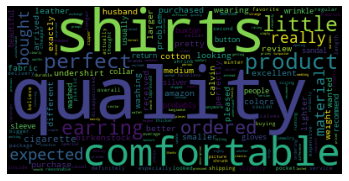

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# reading in data
data = pd.read_csv('review_count.csv')
data_train = data
# removing labels
data = data.iloc[:, 2:]

## wordcloud
wordsForCount = []
for label in set(data.columns):
    wordcount = sum(data[label])
    for i in range(int(wordcount)):
        wordsForCount.append(str(label))

wordsForCount = " ".join(wordsForCount)  # turning list of strings into one string
wordcloud = WordCloud(collocations=False).generate(wordsForCount)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

TrainDF, TestDF = train_test_split(data_train, test_size=0.2)
y_test=TestDF["LABEL"]
x_test = TestDF.drop(["LABEL"], axis=1)
### TRAIN----------------------
y_train=TrainDF["LABEL"]
## remove labels
x_train = TrainDF.drop(["LABEL"], axis=1)

Confusion Matrix:
[[ 22   1   0   2  16]
 [  1  13   0   2  13]
 [  8   2  17   2  19]
 [  0   3   5  39  46]
 [  6   0   7  13 223]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.59      0.54      0.56        41
         2.0       0.68      0.45      0.54        29
         3.0       0.59      0.35      0.44        48
         4.0       0.67      0.42      0.52        93
         5.0       0.70      0.90      0.79       249

    accuracy                           0.68       460
   macro avg       0.65      0.53      0.57       460
weighted avg       0.67      0.68      0.66       460



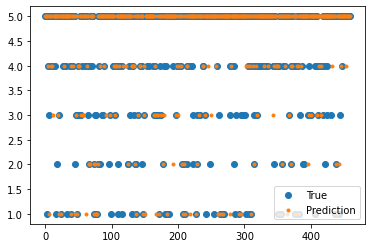

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

cls1 = DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_split=5, min_samples_leaf=2)
cls1.fit(x_train, y_train)
y_pred1 = cls1.predict(x_train)
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred1))
print("Classification Report:")
print(classification_report(y_train, y_pred1))

# plot to show training result
fig = plt.figure()
ax = fig.add_subplot(111)
f1 = ax.scatter(list(range(x_train.shape[0])), y_train, marker='o')
f2 = ax.scatter(list(range(x_train.shape[0])), y_pred1, marker='.')
plt.legend(handles=[f1, f2], labels=['True', 'Prediction'])
plt.show()

Confusion Matrix:
[[ 20   1   0   1  19]
 [  2  11   0   3  13]
 [  7   1  16   1  23]
 [  2   2   4  38  47]
 [  4   0   5   6 234]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.57      0.49      0.53        41
         2.0       0.73      0.38      0.50        29
         3.0       0.64      0.33      0.44        48
         4.0       0.78      0.41      0.54        93
         5.0       0.70      0.94      0.80       249

    accuracy                           0.69       460
   macro avg       0.68      0.51      0.56       460
weighted avg       0.70      0.69      0.67       460



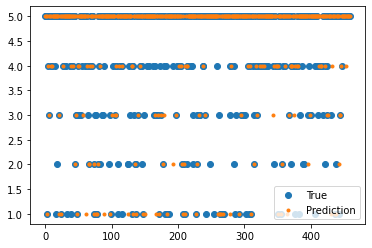

In [42]:
cls2 = DecisionTreeClassifier(criterion='gini', max_depth=30, min_samples_split=5, min_samples_leaf=2)
cls2.fit(x_train, y_train)
y_pred2 = cls2.predict(x_train)
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred2))
print("Classification Report:")
print(classification_report(y_train, y_pred2))

# plot to show training result
fig = plt.figure()
ax = fig.add_subplot(111)
f1 = ax.scatter(list(range(x_train.shape[0])), y_train, marker='o')
f2 = ax.scatter(list(range(x_train.shape[0])), y_pred2, marker='.')
plt.legend(handles=[f1, f2], labels=['True', 'Prediction'])
plt.show()

Confusion Matrix:
[[ 25   1   1  12   2]
 [  1  19   1   8   0]
 [  6   1  33   8   0]
 [  2   5   6  75   5]
 [ 16   4  33 121  75]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.50      0.61      0.55        41
         2.0       0.63      0.66      0.64        29
         3.0       0.45      0.69      0.54        48
         4.0       0.33      0.81      0.47        93
         5.0       0.91      0.30      0.45       249

    accuracy                           0.49       460
   macro avg       0.57      0.61      0.53       460
weighted avg       0.69      0.49      0.49       460



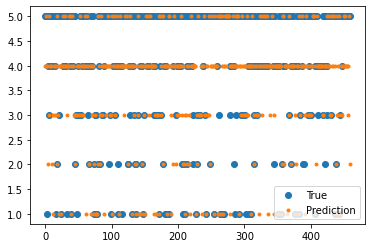

In [25]:
cls3= DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_split=5, min_samples_leaf=2,class_weight='balanced')
cls3.fit(x_train, y_train)
y_pred3 = cls3.predict(x_train)
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred3))
print("Classification Report:")
print(classification_report(y_train, y_pred3))

# plot to show training result
fig = plt.figure()
ax = fig.add_subplot(111)
f1 = ax.scatter(list(range(x_train.shape[0])), y_train, marker='o')
f2 = ax.scatter(list(range(x_train.shape[0])), y_pred3, marker='.')
plt.legend(handles=[f1, f2], labels=['True', 'Prediction'])
plt.show()

Confusion Matrix:
[[ 25   0   1  14   1]
 [  0  20   0   9   0]
 [  2   2  28  16   0]
 [  0   5   6  79   3]
 [ 16   5  30 128  70]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.58      0.61      0.60        41
         2.0       0.62      0.69      0.66        29
         3.0       0.43      0.58      0.50        48
         4.0       0.32      0.85      0.47        93
         5.0       0.95      0.28      0.43       249

    accuracy                           0.48       460
   macro avg       0.58      0.60      0.53       460
weighted avg       0.71      0.48      0.47       460



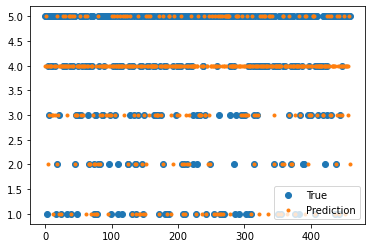

In [26]:
cls4 = DecisionTreeClassifier(criterion='gini', max_depth=30, min_samples_split=5, min_samples_leaf=2,class_weight='balanced')
cls4.fit(x_train, y_train)
y_pred4 = cls4.predict(x_train)
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred4))
print("Classification Report:")
print(classification_report(y_train, y_pred4))

# plot to show training result
fig = plt.figure()
ax = fig.add_subplot(111)
f1 = ax.scatter(list(range(x_train.shape[0])), y_train, marker='o')
f2 = ax.scatter(list(range(x_train.shape[0])), y_pred4, marker='.')
plt.legend(handles=[f1, f2], labels=['True', 'Prediction'])
plt.show()

In [27]:
y_pred_all_true = (y_train == y_pred1) & (y_train == y_pred2) & (y_train == y_pred3) & (y_train == y_pred4)
x_train_all_true = x_train[y_pred_all_true]
y_train_all_true = y_train[y_pred_all_true]

Confusion Matrix:
[[14  1  0  1  0]
 [ 0  9  0  0  0]
 [ 0  0  8  0  0]
 [ 2  0  1 22  0]
 [ 1  0  0  0 62]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.82      0.88      0.85        16
         2.0       0.90      1.00      0.95         9
         3.0       0.89      1.00      0.94         8
         4.0       0.96      0.88      0.92        25
         5.0       1.00      0.98      0.99        63

    accuracy                           0.95       121
   macro avg       0.91      0.95      0.93       121
weighted avg       0.95      0.95      0.95       121



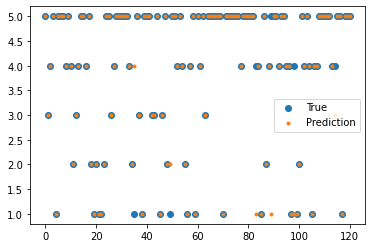

In [28]:
cls_final = DecisionTreeClassifier(criterion='gini', max_depth=30, min_samples_split=5)
cls_final.fit(x_train_all_true, y_train_all_true)
y_pred_final = cls_final.predict(x_train_all_true)

print("Confusion Matrix:")
print(confusion_matrix(y_train_all_true, y_pred_final))
print("Classification Report:")
print(classification_report(y_train_all_true, y_pred_final))

# plot to show training result
fig = plt.figure()
ax = fig.add_subplot(111)
f1 = ax.scatter(list(range(x_train_all_true.shape[0])), y_train_all_true, marker='o')
f2 = ax.scatter(list(range(x_train_all_true.shape[0])), y_pred_final, marker='.')
plt.legend(handles=[f1, f2], labels=['True', 'Prediction'])
plt.show()

Confusion Matrix:
[[ 0  0  0  1  7]
 [ 0  0  0  0  2]
 [ 1  0  0  0 11]
 [ 4  1  0  1 12]
 [ 1  0  0  6 68]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         8
         2.0       0.00      0.00      0.00         2
         3.0       0.00      0.00      0.00        12
         4.0       0.12      0.06      0.08        18
         5.0       0.68      0.91      0.78        75

    accuracy                           0.60       115
   macro avg       0.16      0.19      0.17       115
weighted avg       0.46      0.60      0.52       115



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


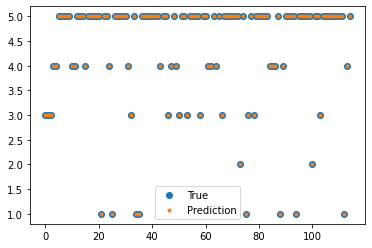

In [29]:
y_pred_test = cls_final.predict(x_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("Classification Report:")
print(classification_report(y_test, y_pred_test))

# plot to show training result
fig = plt.figure()
ax = fig.add_subplot(111)
f1 = ax.scatter(list(range(x_test.shape[0])), y_test, marker='o')
f2 = ax.scatter(list(range(x_test.shape[0])), y_test, marker='.')
plt.legend(handles=[f1, f2], labels=['True', 'Prediction'])
plt.show()

In [30]:
import pydotplus
from sklearn.tree import export_graphviz
import graphviz
import numpy as np
from IPython.display import Image

feature_names=TrainDF.columns[1:]
FeatureImp=cls1.feature_importances_
indices = np.argsort(FeatureImp)[::-1]

def draw_model(tree, filename):
    dot_data = export_graphviz(tree,
    out_file = None,
	feature_names = feature_names,
	class_names = str(tree.classes_),
	filled=True,
	rounded = True,
	special_characters = True)
    #graph = pydotplus.graph_from_dot_data(dot_data)
    #Image(graph.create_png())
    #graph.write_png(filename)
    graph = graphviz.Source(dot_data)
    graph.render(filename)

draw_model(cls1, 'cls_e')
draw_model(cls2, 'cls_g')
draw_model(cls3, 'cls_e_bal')
draw_model(cls4, 'cls_g_bal')
draw_model(cls_final, 'cls_final')
